In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df=pd.read_csv('winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [80]:
df.shape

(6497, 13)

In [81]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [82]:
df.dropna(inplace=True)

In [83]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [84]:
df.duplicated().sum()

1168

In [85]:
df.drop_duplicates(inplace=True)

In [86]:
df.duplicated().sum()

0

In [87]:
df.shape

(5295, 13)

In [88]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [89]:
df.drop(['type'],axis=1,inplace=True)

In [90]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [91]:
d1=df['quality'].value_counts()
d1

6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: quality, dtype: int64

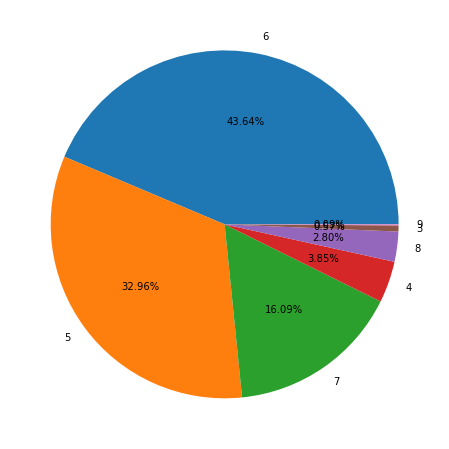

In [92]:
plt.figure(figsize=(10,8))
plt.pie(d1,labels=d1.index,autopct='%.2f%%')
plt.show()

In [93]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [94]:
print(x.shape)
print(y.shape)

(5295, 11)
(5295,)


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3971, 11)
(1324, 11)
(3971,)
(1324,)


In [98]:
def gen_cls_metrics(ytest,ypred):
    print('Accuracy Score',accuracy_score(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred,zero_division=0))

def train_test_score(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

#### SVM

In [124]:
m1=SVC(kernel='linear',C=1)
m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [23]:
train_test_score(m1)

Training Score 0.5376479476202468
Testing Score 0.5400302114803626


In [24]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

[6 5 6 ... 6 6 6]


In [25]:
print('Metrics for SVM Classifier')
gen_cls_metrics(y_test,ypred_m1)

Metrics for SVM Classifier
Accuracy Score 0.5400302114803626
[[  0   0   1   3   0   0   0]
 [  0   0  27  17   0   0   0]
 [  0   0 279 148   0   0   0]
 [  0   0 146 436   0   0   0]
 [  0   0   8 216   0   0   0]
 [  0   0   1  40   0   0   0]
 [  0   0   0   2   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        44
           5       0.60      0.65      0.63       427
           6       0.51      0.75      0.60       582
           7       0.00      0.00      0.00       224
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1324
   macro avg       0.16      0.20      0.18      1324
weighted avg       0.42      0.54      0.47      1324



#### Decision Tree

In [99]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=12)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=12)

In [100]:
train_test_score(m2)

Training Score 0.6298161672122891
Testing Score 0.5279456193353474


In [101]:
ypred_m2=m2.predict(x_test)
print(ypred_m2)

[6 7 6 ... 5 5 7]


In [102]:
print('Metrics for Decision Tree Classifier')
gen_cls_metrics(y_test,ypred_m2)

Metrics for Decision Tree Classifier
Accuracy Score 0.5279456193353474
[[  0   0   4   3   0   0]
 [  0   0  28  17   4   0]
 [  2   6 265 193   6   1]
 [  0   4 120 403  38   3]
 [  0   0  12 143  31   5]
 [  0   0   2  24  10   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        49
           5       0.61      0.56      0.59       473
           6       0.51      0.71      0.60       568
           7       0.35      0.16      0.22       191
           8       0.00      0.00      0.00        36

    accuracy                           0.53      1324
   macro avg       0.25      0.24      0.23      1324
weighted avg       0.49      0.53      0.50      1324



#### Random Forest Classifier

In [103]:
m3=RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5)
m3.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=70)

In [104]:
train_test_score(m3)

Training Score 0.5774364140015109
Testing Score 0.547583081570997


In [105]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[6 7 6 ... 5 6 6]


In [106]:
print('Metrics for Random Forest Classifier')
gen_cls_metrics(y_test,ypred_m3)

Metrics for Random Forest Classifier
Accuracy Score 0.547583081570997
[[  0   0   4   3   0   0]
 [  0   0  22  25   2   0]
 [  0   0 263 208   2   0]
 [  0   0 114 441  13   0]
 [  0   0   2 168  21   0]
 [  0   0   0  32   4   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        49
           5       0.65      0.56      0.60       473
           6       0.50      0.78      0.61       568
           7       0.50      0.11      0.18       191
           8       0.00      0.00      0.00        36

    accuracy                           0.55      1324
   macro avg       0.28      0.24      0.23      1324
weighted avg       0.52      0.55      0.50      1324



#### Log Regression

In [107]:
m4=LogisticRegression(max_iter= 10000)
m4.fit(x_train,y_train)

C:\Users\aman0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=100000)

In [108]:
train_test_score(m4)

Training Score 0.5457063711911357
Testing Score 0.5521148036253777


In [109]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

[6 7 6 ... 5 6 7]


In [110]:
print('Logistic Regression')
gen_cls_metrics(y_test,ypred_m4)

Logistic Regression
Accuracy Score 0.5521148036253777
[[  0   0   3   4   0   0]
 [  0   0  30  18   1   0]
 [  0   0 280 190   3   0]
 [  0   0 122 412  34   0]
 [  0   0   3 149  39   0]
 [  0   0   2  25   9   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        49
           5       0.64      0.59      0.61       473
           6       0.52      0.73      0.60       568
           7       0.45      0.20      0.28       191
           8       0.00      0.00      0.00        36

    accuracy                           0.55      1324
   macro avg       0.27      0.25      0.25      1324
weighted avg       0.51      0.55      0.52      1324



#### KNN

In [115]:
m5=KNeighborsClassifier(n_neighbors=49)
m5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=49)

In [116]:
train_test_score(m5)

Training Score 0.48627549735582976
Testing Score 0.45845921450151056


In [117]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

[6 6 6 ... 6 5 6]


In [118]:
print('KNN')
gen_cls_metrics(y_test,ypred_m5)

KNN
Accuracy Score 0.45845921450151056
[[  0   0   3   4   0   0]
 [  0   0  19  30   0   0]
 [  0   0 185 284   4   0]
 [  0   0 144 410  14   0]
 [  0   0  23 156  12   0]
 [  0   0  10  25   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        49
           5       0.48      0.39      0.43       473
           6       0.45      0.72      0.56       568
           7       0.39      0.06      0.11       191
           8       0.00      0.00      0.00        36

    accuracy                           0.46      1324
   macro avg       0.22      0.20      0.18      1324
weighted avg       0.42      0.46      0.41      1324



### Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
m6=GaussianNB()
m6.fit(x_train,y_train)

GaussianNB()

In [121]:
train_test_score(m6)

Training Score 0.4500125912868295
Testing Score 0.43731117824773413


In [122]:
ypred_m6=m6.predict(x_test)
print(ypred_m6)

[8 7 7 ... 6 7 7]


In [123]:
print('Naive Bayes')
gen_cls_metrics(y_test,ypred_m6)

Naive Bayes
Accuracy Score 0.43731117824773413
[[  1   0   5   0   1   0   0]
 [  1   5  23  15   5   0   0]
 [  5  35 214 193  26   0   0]
 [  2  26 125 261 139  15   0]
 [  0   4  11  61  95  19   1]
 [  0   0   5   9  18   3   1]
 [  0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           3       0.11      0.14      0.12         7
           4       0.07      0.10      0.08        49
           5       0.56      0.45      0.50       473
           6       0.48      0.46      0.47       568
           7       0.33      0.50      0.40       191
           8       0.08      0.08      0.08        36
           9       0.00      0.00      0.00         0

    accuracy                           0.44      1324
   macro avg       0.23      0.25      0.24      1324
weighted avg       0.46      0.44      0.44      1324

